---
title: California Food Affordability
authors:
  - Seungwon (Sydney) Lee
  - Demi Leng
  - Darlene Zhang
  - Hannah Chung
bibliography: references.bib
---

This analysis uses publicly available data from the California Department of Public Health (@california_food_affordability).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

In [2]:
data = pd.read_csv('./data/food_affordability.csv')
data.head(5)

,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_name,county_fips,...,median_income,affordability_ratio,LL95_affordability_ratio,UL95_affordability_ratio,se_food_afford,rse_food_afford,food_afford_decile,CA_RR_Affordability,ave_fam_size,version
0,757,Food affordability for female-headed household...,2006-2010,1.0,AIAN,CA,6.0,California,NaN,NaN,...,23777.0,0.315779,0.231517,0.400043,0.042991,13.614342,NaN,1.185347,3.34,4/12/2013 4:33
1,757,Food affordability for female-headed household...,2006-2010,2.0,Asian,CA,6.0,California,NaN,NaN,...,38508.0,0.194980,0.183065,0.206895,0.006079,3.117814,NaN,0.731900,3.34,4/12/2013 4:33
2,757,Food affordability for female-headed household...,2006-2010,3.0,AfricanAm,CA,6.0,California,NaN,NaN,...,26192.0,0.286664,0.279661,0.293666,0.003573,1.246349,NaN,1.076054,3.34,4/12/2013 4:33
3,757,Food affordability for female-headed household...,2006-2010,4.0,Latino,CA,6.0,California,NaN,NaN,...,22858.0,0.328475,0.322637,0.334314,0.002979,0.906881,NaN,1.233004,3.34,4/12/2013 4:33
4,757,Food affordability for female-headed household...,2006-2010,5.0,NHOPI,CA,6.0,California,NaN,NaN,...,36737.0,0.204379,0.173762,0.234997,0.015621,7.643255,NaN,0.767183,3.34,4/12/2013 4:33


# 1. Introduction
California presents a unique economic paradox: it is one of the world's most productive agricultural regions, yet it is also home to some of the highest costs of living in the United States. For vulnerable populations, particularly female-headed households with children, the ability to afford a nutritious diet is often compromised by competing expenses such as housing and healthcare.

This project investigates the affordability ratio—defined as the proportion of median household income required to purchase a standard nutritious diet—across California’s diverse landscape. By leveraging demographic, economic, and geographic data, we aim to disentangle the factors that drive food insecurity. Is affordability primarily driven by the price of food itself, or is it fundamentally an issue of income inequality? Our analysis seeks to answer this by examining regional disparities, urban versus rural divides, and the predictive power of various socioeconomic indicators.

Here is a link for accessing our data: [click here](https://data.ca.gov/dataset/food-affordability) 


# 2. Goal of Analysis
The primary objective of this analysis is to identify the structural drivers of food affordability in California. We structure our investigation around four specific research questions (RQs):

**RQ1: Which socioeconomic and geographic factors (e.g., income, region, race) most strongly predict food affordability?**

**RQ2: Are there statistically significant differences in food affordability across different regions, geotypes (urban vs. rural), and income levels?**

**RQ3: Does the relationship between income and affordability change depending on the region? (Interaction Effects)**

**RQ4: When all predictors are considered jointly—including the actual cost of food—which variable is the most critical driver of affordability?**

# 3. About the Data
The dataset covers food affordability metrics for female-headed households with children (under 18) in California during the period of 2006–2010.

**Source**: The data is aggregated at various geographic levels, including county, place, and state.

**Target Variable**: affordability_ratio. This metric represents the cost of a standard food basket divided by the median household income. A higher ratio indicates lower affordability (a higher financial burden).

**Key Features**:

    cost_yr: Annual cost of a nutritious food basket.

    median_income: Median household income for the specific demographic.

    region_name: Geographic region (e.g., Bay Area, San Joaquin Valley).

    geotype: Classification of the area (e.g., Large City, Rural, Town).

**Preprocessing**:

To ensure a consistent unit of analysis, we restricted our modeling to Place-Level (geotype == "PL") observations, representing cities, towns, and census-designated places.

We cleaned the data by removing administrative columns (ind_id, reportyear) and dropping records with missing values in key predictors. The final dataset contains approximately 3,473 observations.

#  4. Data Exploration
Before modeling, we conducted an Exploratory Data Analysis (EDA) to understand the distribution of our target variable and observe initial spatial patterns.

## 4.1 Distribution of Affordability
The affordability ratio is not normally distributed. As shown in the histogram below, the data is right-skewed. This indicates that while the majority of households spend a moderate percentage of their income on food, there is a significant "tail" of households for whom food costs represent an extreme financial burden.

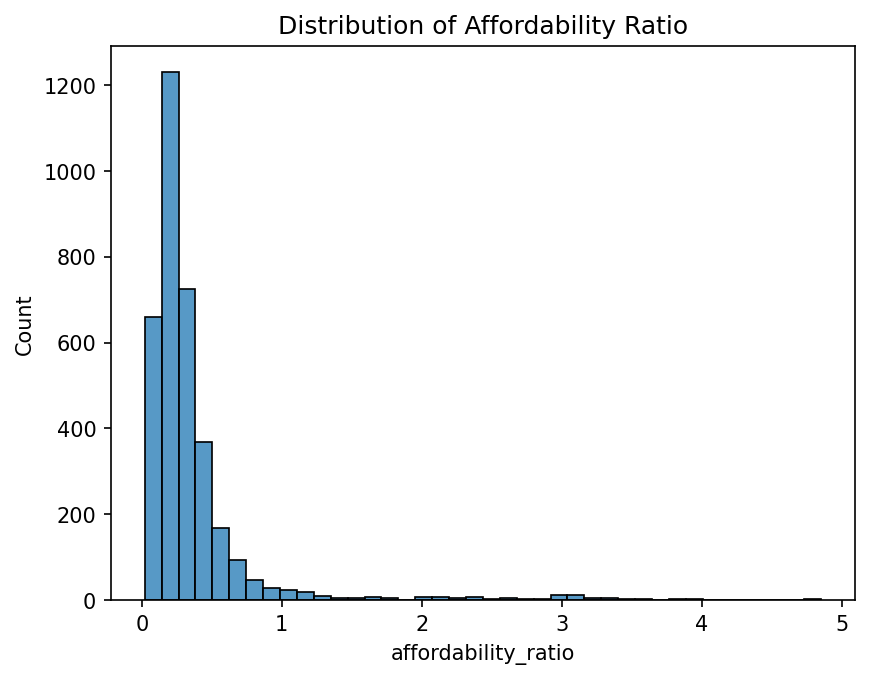

In [3]:
display(Image(filename='figures/affordability_ratio_dist.png'))

## 4.2 Regional Disparities
We grouped the data by region_name to examine spatial inequalities. Using affordability deciles (where higher deciles indicate better affordability), we observed a striking geographic divide:

**High Affordability**: The Bay Area, despite having high costs of living, shows the best food affordability. This suggests that high median incomes in this region outpace the cost of food.

**Low Affordability**: The San Joaquin Valley—the agricultural hub of the state—ranks lowest in affordability. This highlights a critical finding: living near food production does not guarantee food access if incomes are insufficient.

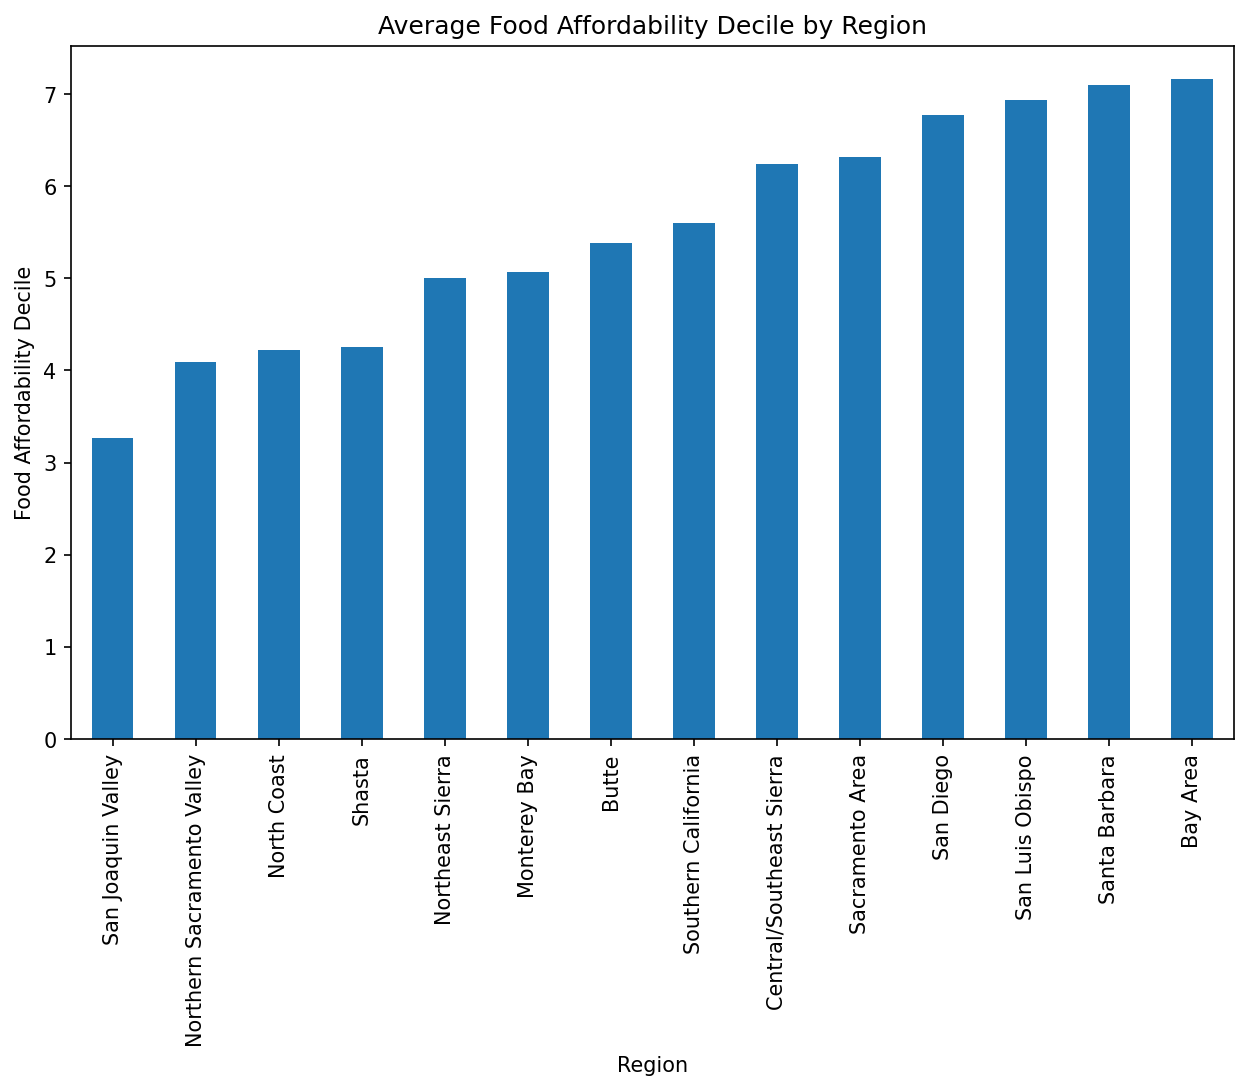

In [4]:
display(Image(filename='figures/eda_regional_bar.png'))

# 5. Modeling
## RQ1: Predicting Affordability with Contextual Factors

**Approach**: We used Ridge Regression to compare the predictive power of "contextual" variables (Income, Region, and Race) without including the mathematical components of the ratio itself (like food cost). This allows us to see which environmental factors signal low affordability.

**Results**:
- Models relying solely on Race or Region performed poorly ($R^2 < 0.10$).
- The inclusion of Median Income drastically improved performance.
- The best-performing specification was region_name + median_income, achieving an $R^2 \approx 0.27$. This confirms that income is the primary lever, but regional context adds necessary nuance.

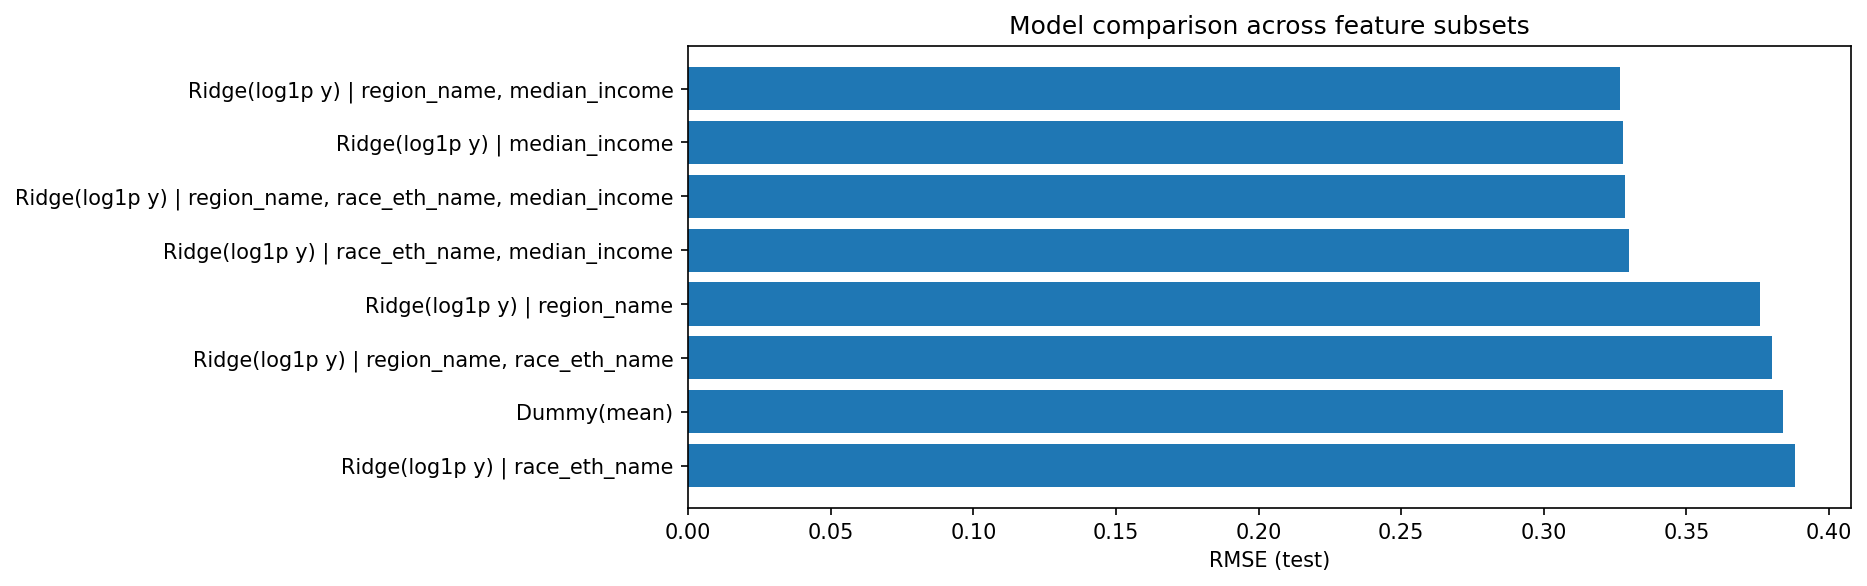

In [5]:
# Display RQ1 Model Comparison
display(Image(filename='figures/rq1_pl_subset_models_rmse.png'))

## RQ2: Statistical Differences Across Groups
**Approach**: We performed three one-way ANOVA tests to determine if the mean affordability_ratio differs significantly across:
1. Regions (e.g., Bay Area vs. Los Angeles)
2. Geotypes (Urban vs. Rural)
3. Income Levels (Categorical bins)

**Results** :We rejected the null hypothesis for all three tests ($p < 0.05$). Post-hoc Tukey HSD tests revealed:
- Geotype: Rural areas often face higher burdens than urban centers, likely due to a combination of lower incomes and lower food access.
- Region: The difference between the Bay Area and the Central Valley is statistically significant, reinforcing our EDA findings.

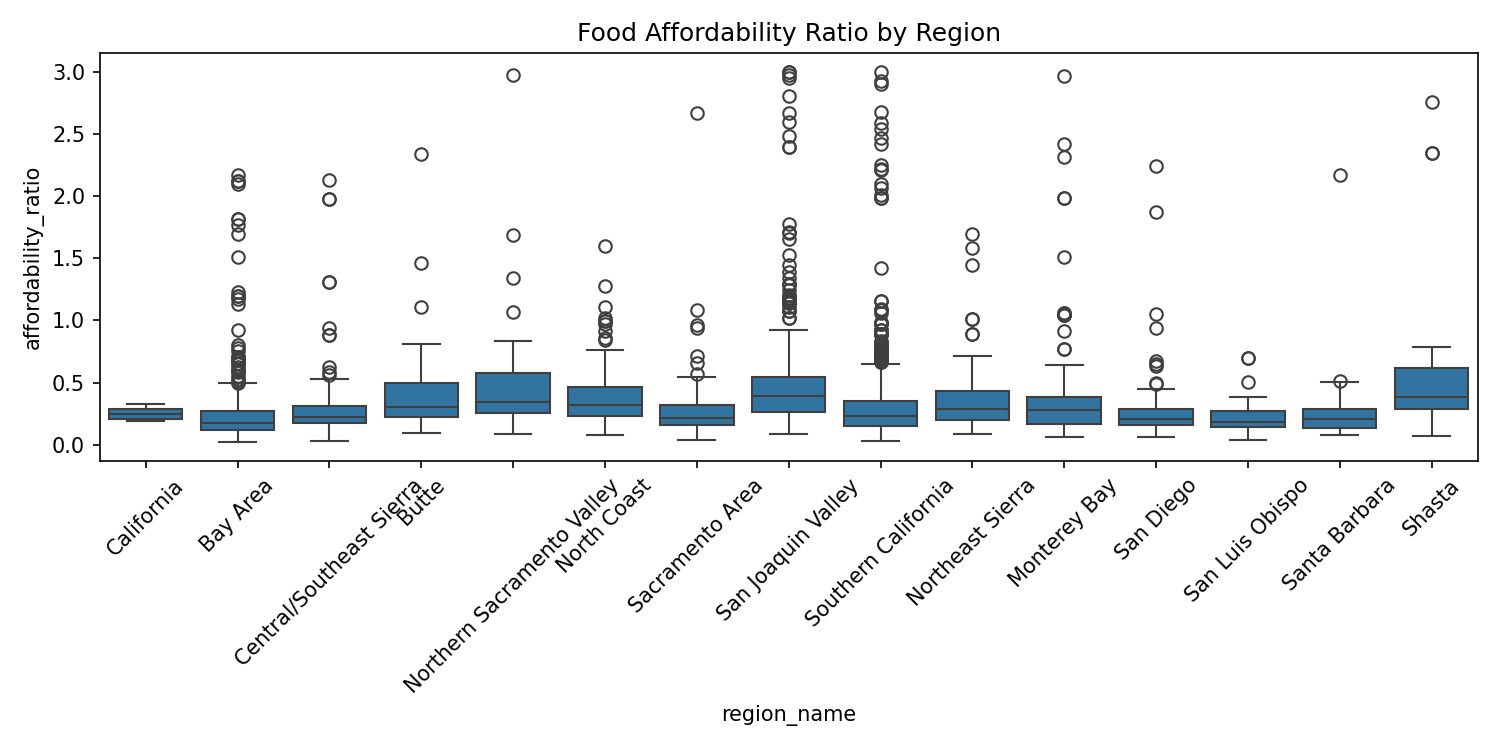

In [6]:
display(Image(filename='figures/rq2_boxplot.png'))

 ## RQ3: Interaction of Income and Region
 
**Approach**: We hypothesized that the benefit of additional income might depend on where a household lives. To test this, we fitted an OLS interaction model:
$$\text{Affordability Ratio} = \beta_0 + \beta_1(\text{Income}) + \beta_2(\text{Region}) + \beta_3(\text{Income} \times \text{Region})$$

**Results** :The interaction terms were statistically significant. As visualized below, the slope of the line varies by region. In lower-cost regions, a small increase in income drastically improves affordability. In high-cost coastal regions, the relationship is slightly different, likely dampened by other cost-of-living factors (like housing) that correlate with food prices.

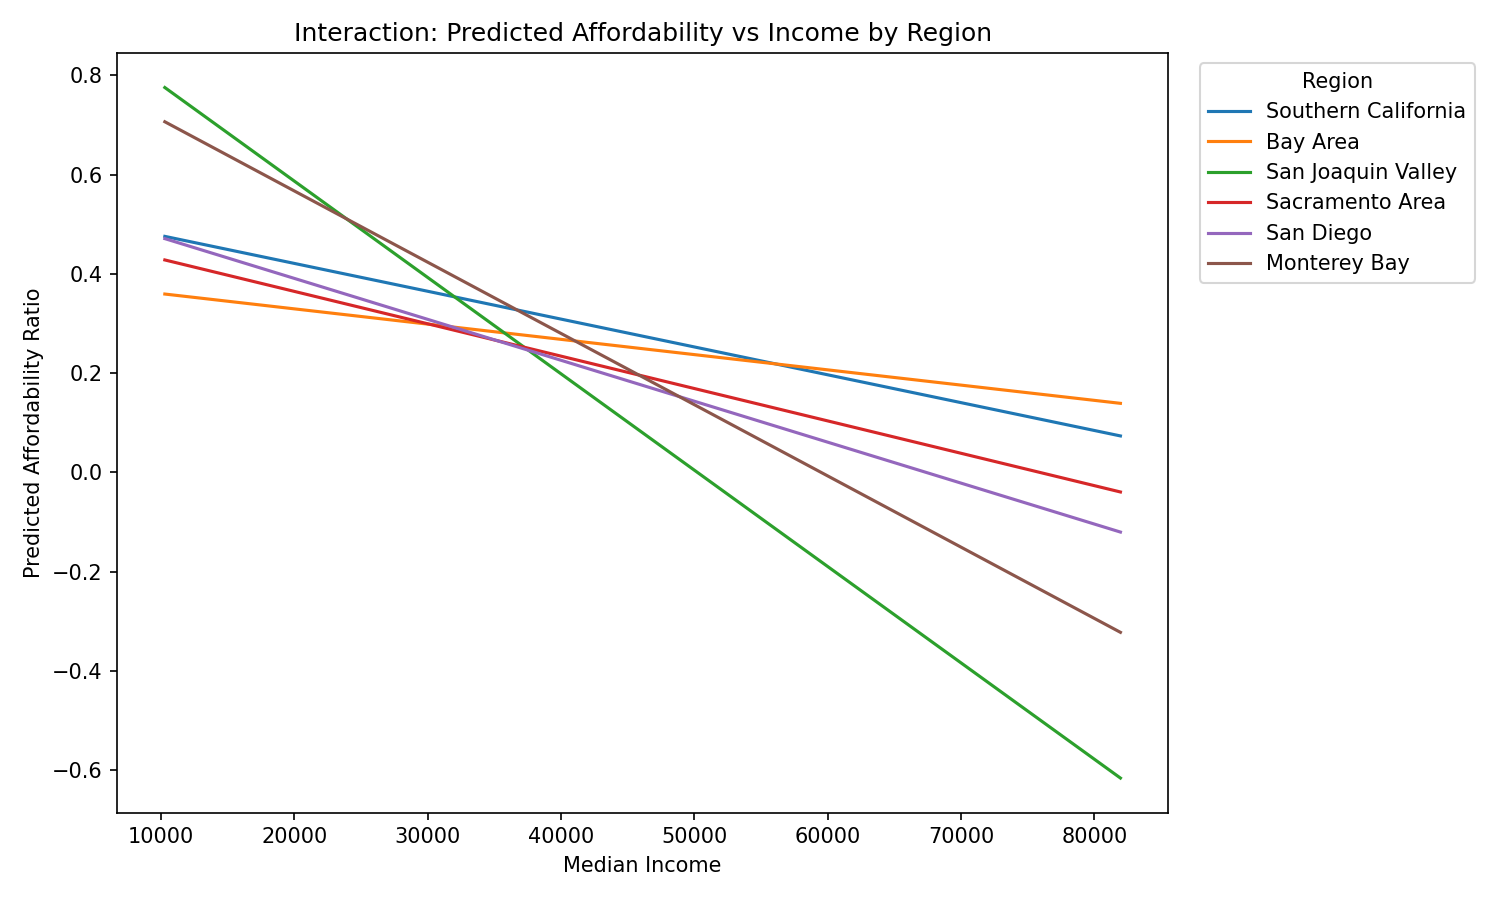

In [7]:
display(Image(filename='figures/rq3_income_region_interaction.png'))

## RQ4: Feature Importance (The "Full" Picture)
**Question**: When we consider everything—including how much food actually costs—what is the most important driver? 

**Approach**: We used a Random Forest Regressor and calculated Permutation Importance. This method measures how much the model's accuracy drops if we randomly shuffle a specific feature's data (breaking its link to the target).

**Results:**

- Dominance of Income: Even when the model is given the actual price of food (cost_yr), median_income remains the overwhelming predictor of the affordability ratio.

- Secondary Factors: cost_yr is the second most important feature, but it lags significantly behind income.

- Demographics: Once income and costs are accounted for, variables like race_eth_name and geotype have negligible predictive power, suggesting they are proxies for income inequality rather than direct drivers of food prices.

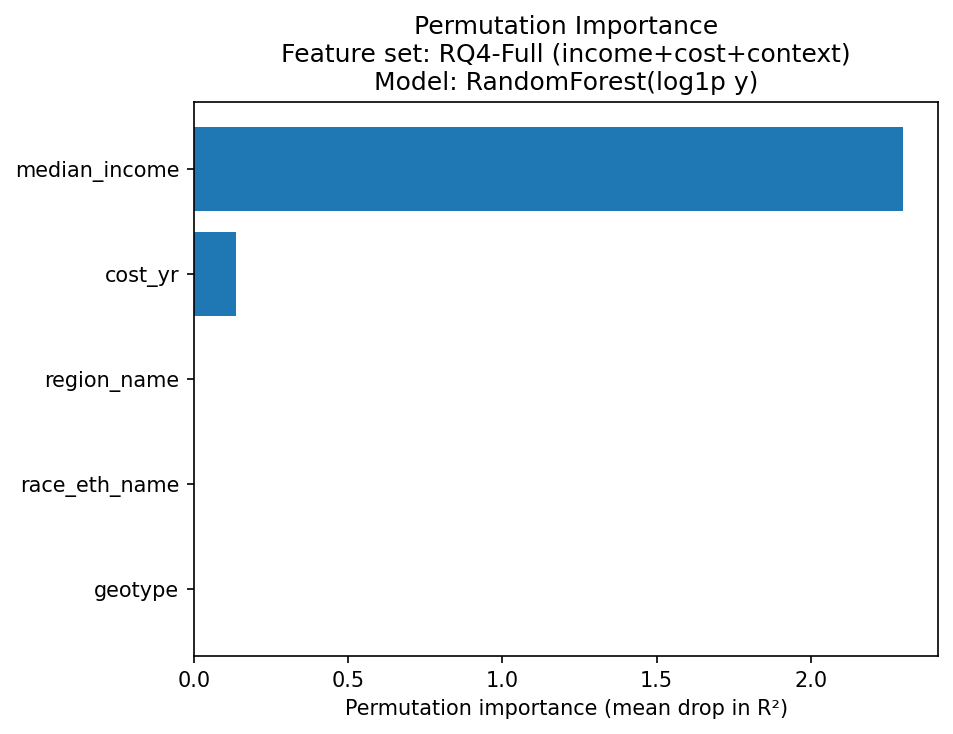

In [8]:
display(Image(filename='figures/rq4_perm_importance__rq4-full__randomforest.png'))

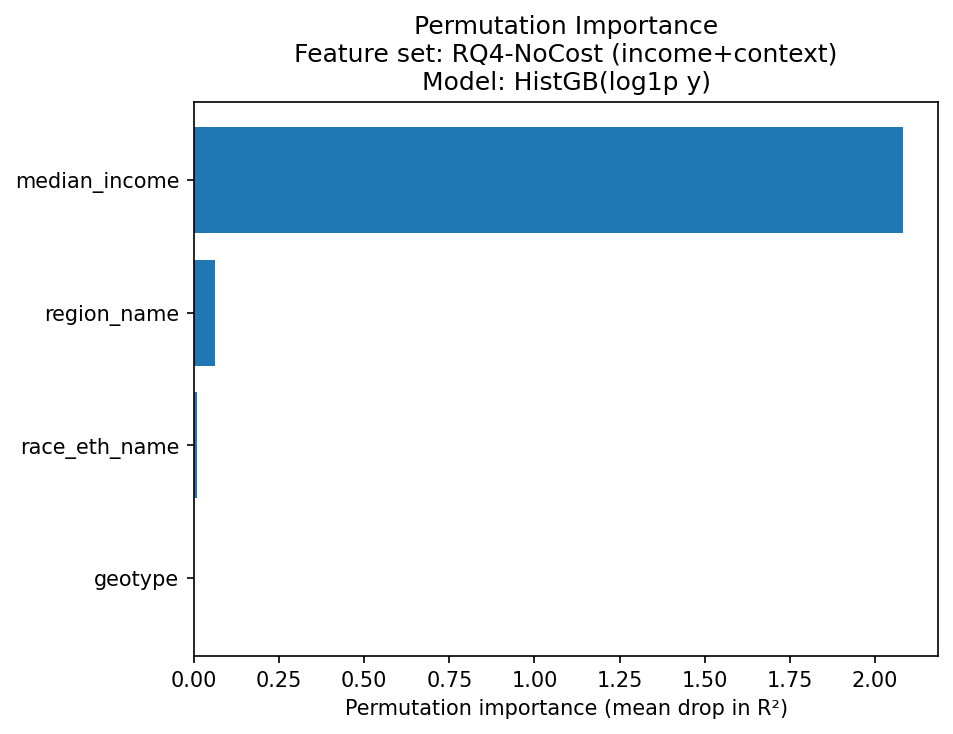

In [9]:
display(Image(filename='figures/rq4_perm_importance__rq4-nocost__histgb.png'))

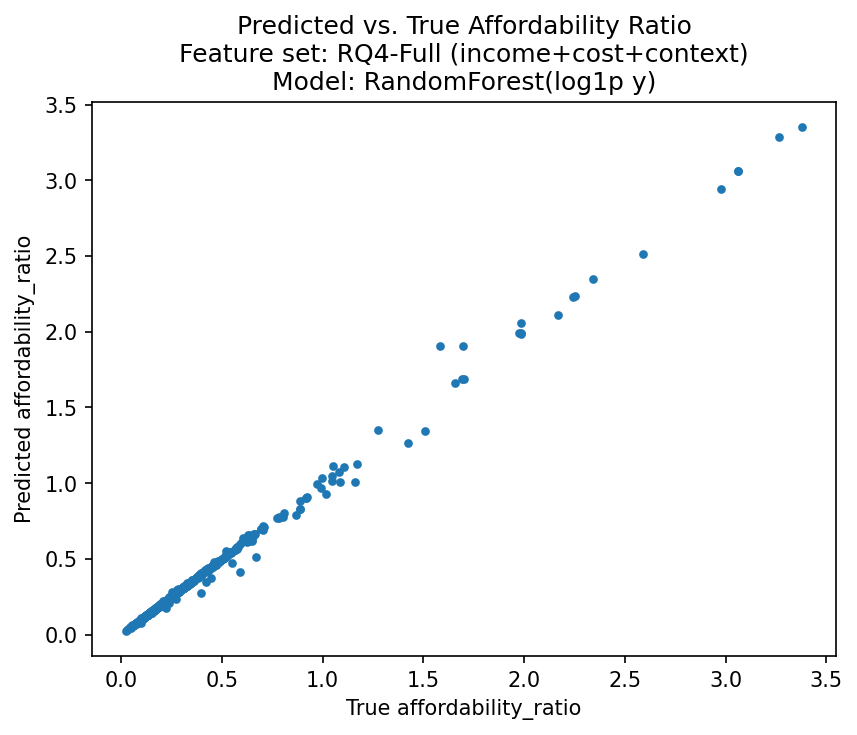

In [10]:
display(Image(filename='figures/rq4_pred_vs_true__rq4-full__randomforest.png'))

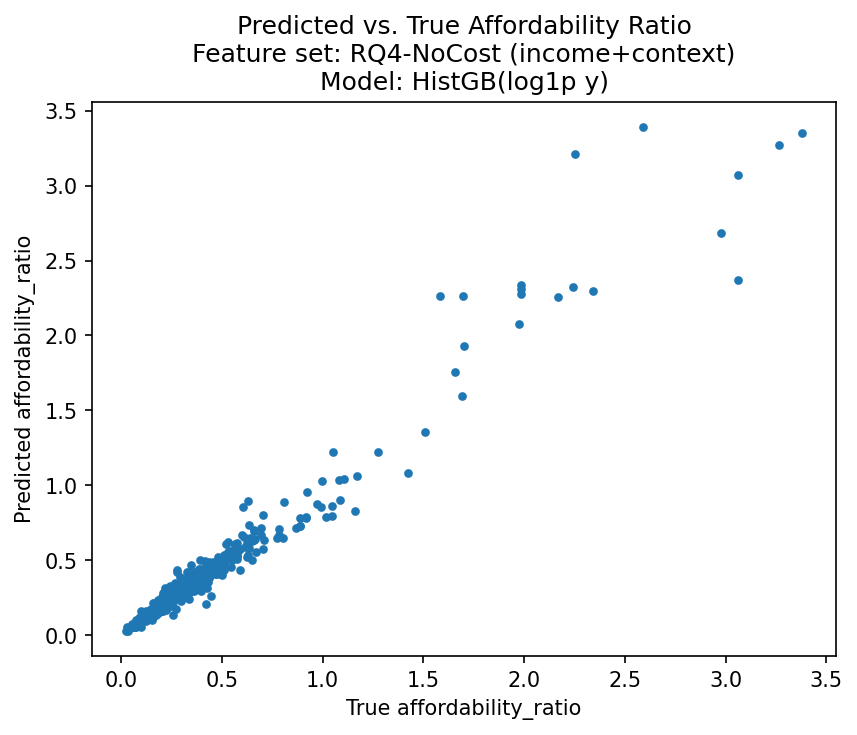

In [11]:
display(Image(filename='figures/rq4_pred_vs_true__rq4-nocost__histgb.png'))

# 6. Conclusions
Our research demonstrates that food affordability in California is fundamentally an economic issue rather than a supply-side issue.

**Income is King**: Across all models, median income was the single strongest predictor of whether a household could afford a nutritious diet.

**The Agricultural Paradox**: The San Joaquin Valley, despite being a major food producer, faces the highest food cost burdens due to lower regional incomes.

**Policy Implications**: Interventions focused solely on lowering food prices may have limited impact compared to policies that raise household incomes (e.g., earned income tax credits, higher wages) or provide direct cash assistance.

## Author Contributions

- **Seungwon (Sydney) Lee**
    - created EDA.ipynb
    - proposed research questions and analysis direction
    - set up MyST build
    - created environment.yml and Makefile
    - added BibTeX references
    - configured Binder

- **Demi Leng**
    - created model_rq1.ipynb
    - created model_rq4.ipynb
    - created README.md
    - created model_utils.py
    - created test_model_utils.py
    - created conftest.py
    - created pdf_builds

- **Darlene Zhang**
    - contributed to EDA.ipynb
    - completed main.ipynb
  

- **Hannah Chung**
    - created model_rq2.ipynb
    - created model_rq3.ipynb
    - created pdf_build
    - contributed to environment.yml
    - contributed to Makefile
